#Psychrometric Functions, from ASHRAE HoF 2013

Functions include the following:

Pws(C) Saturation vapor pressure (Pa)

pw(C, rh) Partial vapor pressure (Pa), provided relative humidity - rh expressed in fractional (0.6=60%)

pwW(C,w) Partial vapor pressure (Pa), provided humidity ratio

Td(C, rh) Dew point temperature (C), provided relative humidity

TdW(C, w, p=101325) Dew point tempeature (C), provided humidity ratio

rh(w, C, p=101325) Relative humidity (fractional percentage), defaults to atmospheric pressure of 101325

w(C, rh, p=101325) Humidity ratio (kg/kg)

Ws(C, p=101325) Saturation humidity ratio (kg/kg)

vSpec(C, w, p=101325) Specific volume of air (m3/kg-dryair)

h(C, w) Moist air specific enthalpy (kJ/kg-dryair)

rho(C, w, p=101325) Air density (kg/m3)


In [9]:
#Coefficients for saturation vapor pressure over ice -100 to 0C
C1<--5.6745359E+03
C2<-6.3925247E+00
C3<--9.6778430E-03
C4<-6.2215701E-07
C5<-2.0747825E-09
C6<--9.4840240E-13
C7<-4.1635019E+00

#Coefficients for saturation vapor pressure over liquid water 0 to 200C
C8<--5.8002206E+03
C9<-1.3914993E+00
C10<--4.8640239E-02
C11<-4.1764768E-05
C12<--1.4452093E-08
C13<-6.5459673E+00



#Function that calculates the water vapor saturation pressure in Pascals. 
#Input temperature in degrees Celcius. Based on equations 5 and 6 in HoF.

Pws=function(C){
K<-273.15+C
if(C<=0){
	return(exp((C1/K)+(C2)+(C3*K)+(C4*K^2)+(C5*K^3)+(C6*K^4)+(C7*log(K))))
} else{
	return(exp((C8/K)+(C9)+(C10*K)+(C11*K^2)+(C12*K^3)+(C13*log(K))))
}
}

#Function pw() calculates the partial pressure of water vapor, inputs are 
#temperature (C) and relative humidity (rh) in decimal form(i.e., 60% = 0.60)
#From equation 24 in HoF.

pw=function(C, rh){
return(rh*Pws(C))
}


#Function pwW() returns the partial pressure of water vapor, inputs are
#humidity ratio (w), temperature (C) and atmospheric pressure (p)

pwW=function(C, w, p=101325){
return((p*(w/0.621945))/(1+(w/0.621945)))
}

#Coefficients used in calculation of dew point temperature
C14<-6.54
C15<-14.526
C16<-0.7389
C17<-0.09486
C18<-0.4569

#Function Td() calculates the dew point temperature (C), with inputs of
# temperature (C) and relative humidity (rh).
#Based on equation 39 and 40 in HoF.

Td=function(C, rh){
alpha=log(pw(C,rh)/1000)
if(C<=0){
return(6.09+12.608*alpha+0.4959*alpha^2)
} else{
return((C14)+(C15*alpha)+(C16*alpha^2)+(C17*alpha^3)+(C18*(pw(C, rh)/1000)^0.1984))
}
}

#Function TdW() calculates the dew point temperature (C), with inputs of
# temperature (C) and humidity ratio (w).
#Based on equation 39 and 40 in HoF.

TdW=function(C, w, p=101325){
alpha=log(pwW(C,w,p)/1000)
if(C<=0){
return(6.09+12.608*alpha+0.4959*alpha^2)
} else{
return((C14)+(C15*alpha)+(C16*alpha^2)+(C17*alpha^3)+(C18*(pwW(C, w)/1000)^0.1984))
}
}

#Function rh() returns the decimal value of relative humidity, based on
#inputs of humidity ratio (w), temperature (C) and atmospheric pressure (p)
#Dervied from equation 22 in HoF. 

rh=function(w,C,p=101325){
Pw<-(p*(w/0.621945))/(1+(w/0.621945))
return(Pw/Pws(C))
}

#Function w() taks the Temperature (C), relative humidity (rh) in decimal form
#(i.e., 60% = 0.60), and the atmospheric pressure (p)
#Derived from equation 22 in HoF.

w=function(C,rh,p=101325){
w<-0.621945/((p/(rh*Pws(C)))-1)
return(w)
}

#Function Ws() returns the Saturation Humidity Ratio (Ws) in kg/kg, which
#is the humidity ratio at saturation for a given temperature and pressure.

Ws=function(C, p=101325){
return(w(C, 1))
}


#function vSpec() returns the specific volume of air, represented in terms
#of mass of dry air (units m3/Kgda). Inputs are Temperature (C), humidity
#ratio (w) and atmospheric pressure (p).
#Based on equation 28 in the HoF.

vSpec=function(C, w, p=101325){
K<-273.15+C
return(0.287042*K*(1+1.607858*w)/p)
}

#Function h() returns the moist air specific enthalpy (kJ/Kgda), based on
#inputs of temperature (C) and humidity ratio (w).
#Based on equation 32 in HoF.

h=function(C, w){
return((1.006*C) + w*(2501+1.86*C))
}

#Function rho() returns the density of air, expressed as the ratio of total mass
#to total volume (kg/m3). Inputs are the specific volume and humidity ratio.
#Based on equation 11 in HoF.

rho=function(C, w, p=101325){
return((1/vSpec(C,w,p))*(1+w))
}


In [12]:
Td(20,1.0)

[1] 20.01424

In [2]:
pw(20,0.60)

[1] 1403.282

In [3]:
Pws(20)

[1] 2338.804

In [4]:
pw(20,0.60)/Pws(20)

[1] 0.6

OK, now I want to test accessing and processing files located on my personal cpu.

Will this work when Leo looks at this notebook on Github, or on his machine? Can he edit the code and get different results?

In [4]:
setwd('/Users/brennanless/GoogleDrive/')

In [6]:
dat<-read.csv("OffermanAERdata.csv")

In [7]:
head(dat)

,HomeID,Volume,AER,Date,F0T3Dt,Month
1,1,16624.44,0.2493759,07-Aug-06,08-Aug-06,8
2,2,17328,6.471776,07-Aug-06,08-Aug-06,8
3,3,19583.5,0.7060358,07-Aug-06,08-Aug-06,8
4,4,19136,0.4520448,08-Aug-06,09-Aug-06,8
5,5,28391,0.1654131,08-Aug-06,09-Aug-06,8
6,6,35404,0.1646706,08-Aug-06,09-Aug-06,8


In [10]:
dat$Volume

[1] 16624.44 17328.00 19583.50 19136.00 28391.00 35404.00 10918.00 10666.75
  [9] 18046.94 13821.00 18107.00 19901.00 31320.00 27340.00 21580.00 19556.00
 [17] 16304.00 38916.00 20748.00 19764.00 14223.00 33317.24 27413.62 24128.00
 [25] 23416.20 16614.79 28909.83 20497.00 23294.00 22908.94 21182.29 21182.00
 [33] 21182.00 55612.78 31772.00 31772.00 31772.00 22276.16 17661.00 25522.14
 [41] 26995.56 25606.00 19970.00 26835.72 18289.95 20919.81 27489.00 32043.00
 [49] 34209.65 34414.27 24865.00 32662.50 34641.00 32829.00 32829.00 32829.00
 [57] 24578.92 22909.00 28888.44 26598.41 27207.26 21041.88 32847.99 25618.35
 [65] 24410.62 27170.46 26057.05 17328.00 19136.00 28391.00 35404.00 10918.00
 [73] 13821.00 19556.00 16304.00 38916.00 24128.00 21788.00 21098.00 34194.00
 [81] 34194.00 34194.00 16010.00 16663.00 15158.00 34840.00 21273.00 25399.00
 [89] 26961.00 21330.00 13821.00 40371.00 27450.00 30164.00 17462.00 40288.00
 [97] 22231.00 13296.00 13144.00 12459.00 20499.00 31772.00 31772.00 17661.00
[105] 17661.00 17661.00 25606.00 19970.00 27489.00 32043.00 34641.00 32829.00
[113] 22909.00 26252.00 28356.00 37463.00 30752.00 33599.00 26172.00 17949.00
[121] 27626.00 18989.00 16223.00 20537.00 21224.00 16187.00 17392.00 26735.00
[129] 23064.00 17439.00 21534.00 27570.00 20276.00 12996.00 26729.00 33276.00
[137] 28391.00 35404.00 19901.00 38916.00

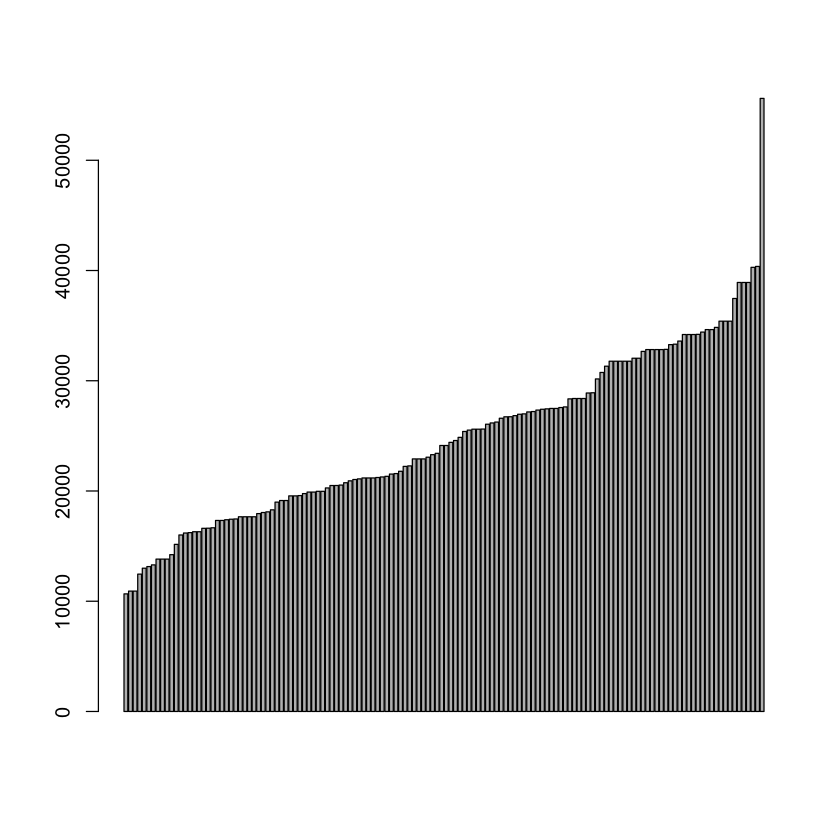

In [12]:
barplot(sort(dat$Volume))

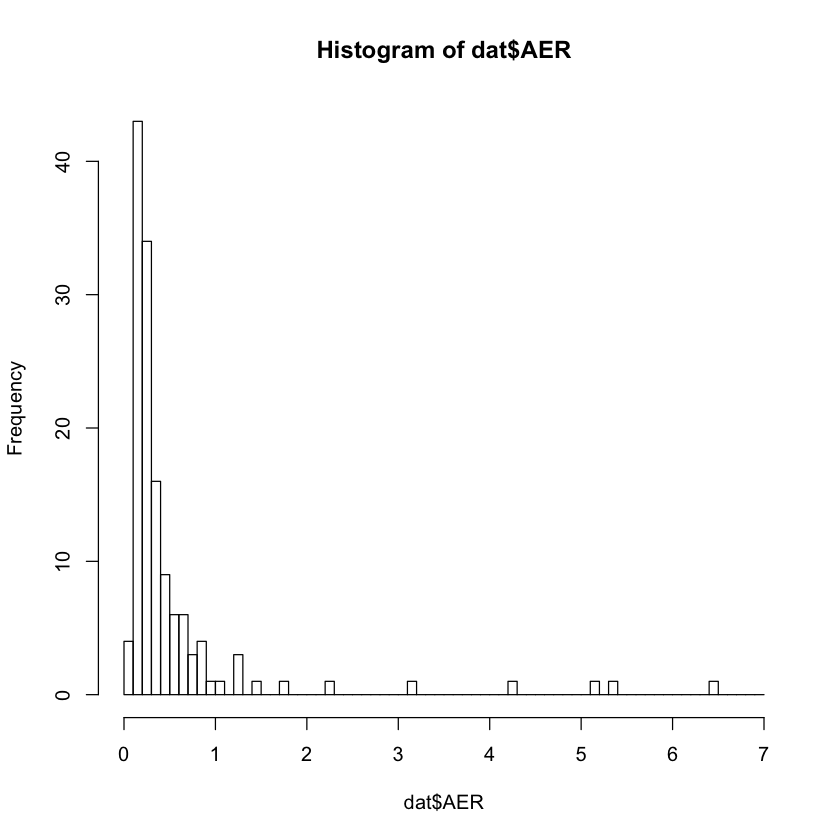

In [20]:
hist(dat$AER, breaks=seq(from=0, to=ceiling(max(dat$AER, na.rm=TRUE)), by=0.1))

In [16]:
ceiling(max(dat$AER))

[1] NA

In [19]:
ceiling(max(dat$AER, na.rm=TRUE)) 

[1] 7